In [1]:
import numpy as np
import matplotlib.pyplot as plt
def reshapelist(m):
    """
    m: list (flat)
    return np.ndarray of shape(len(m), 1)
    """
    if isinstance(m, float) or isinstance(m, int):
        return np.reshape(np.array([m]), (1,1))
    elif isinstance(m, np.ndarray):
        if len(m.shape) > 1:
            return m
        else:
            return np.reshape(m, (len(m),1))
        
    else:
        return np.reshape(np.array(m), (len(m),1))

In [2]:
V = np.arange(40, 141, 10)
D = np.arange(200, 700, 75)

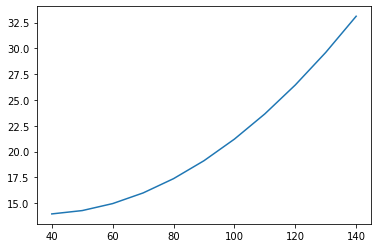

In [3]:
def consumption(v):
    """
    v in km
    Consumption function approximated for 30 < v < 130
    kWh per km
    """
    (a, b, c) = (0.001767198580424459, -0.12671223347795096, 16.208785642924134)
    return (a*(v**2) + b*v + c)/100
fig = plt.figure()
ax = plt.axes()
ax.plot(V, 100*consumption(V), label='Consumption in kWh/100km');

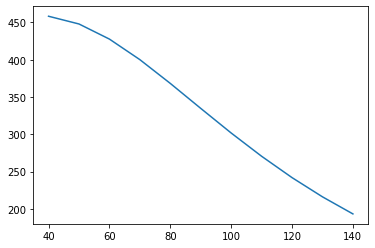

In [4]:
def available_distance(e, c, s=0):
    """
    Returns the distance that you can travel with the battery level
    e : energy available, kWh
    c: consumption, kWh per km
    s: safety distance, km
    """
    return (e/c-s)
fig = plt.figure()
ax = plt.axes()
ax.plot(V, available_distance(e=64, c=consumption(V), s=0), label='Available Total Distance in km');

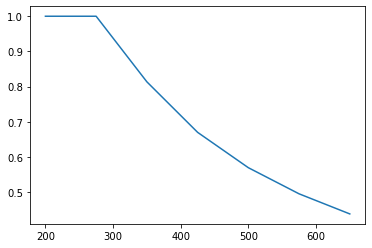

In [5]:
def pct_battery_coverage(d, e, c, s=0):
    """
    Returns the percentage of the trip that is covered by the battery
    d: distance km
    e: energy in the battery, kWh
    c: consumption, kWh per km
    s: safety distance at the end of the trip, km
    """
    dfull = available_distance(e, c, s) # Available distance after factoring the safety distance
    b_pct_raw = np.divide(
        reshapelist(dfull),
        np.transpose(reshapelist(d))
    ) # available_distance / distance, 0 <= b_pct_raw
    mi = np.full(b_pct_raw.shape, 1) # a matrix full of 1 with same shape as b_pct_raw, used for minimum in next step
    b_pct = np.minimum(mi, b_pct_raw) # available_distance / distance, 0 <= b_pct <= 1
    return b_pct
fig = plt.figure()
ax = plt.axes()
ax.plot(D, pct_battery_coverage(D, e=64, c=consumption(90), s=50).reshape(-1,1),  label='Consumption in kWh/100km');

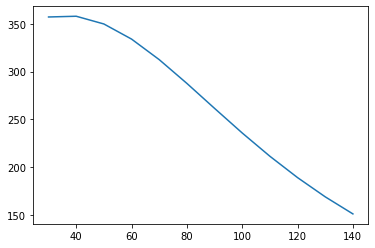

In [14]:
def charge_speed(p, c=15):
    """
    p: power charging speed, in kW
    c: kWh/km 
    """
    return p/c
fig = plt.figure()
ax = plt.axes()
p = 50
ax.plot(V, p/consumption(V), label='Consumption in kWh/100km');

In [23]:
def effective_travel_speed(d, v, e, s=0, p=50):
    c = consumption(v)
    ratio_charging_speed = v/charge_speed(p, c)
    pct_cruise = 1-pct_battery_coverage(d, e, c, s)
    charging_factor = np.multiply(
        pct_cruise,
        reshapelist(ratio_charging_speed)
    )
    f = np.divide(
        reshapelist(v),
        (1 + charging_factor)
    )
    return f

def cruise_speed(v, e, p=50):
    """
    Cruise speed (no battery effect)
    """
    c = consumption(v)
    ratio_charging_speed = v/charge_speed(p, c)
    f = np.divide(
        reshapelist(v),
        (1 + ratio_charging_speed)
    )
    return f
cruise_speed(V, 64, 50)

array([[ 27.67559885,  26.98466567,  26.24874685,  25.43201365,
         24.51030789,  23.47215726,  22.31907251,  21.06459092,
         19.73193585,  18.35060535,  16.95252261,  15.56846197],
       [ 36.90079846,  35.97955422,  34.99832914,  33.90935154,
         32.68041052,  31.29620968,  29.75876334,  28.08612122,
         26.3092478 ,  24.46747381,  22.60336348,  20.75794929],
       [ 46.12599808,  44.97444278,  43.74791142,  42.38668942,
         40.85051315,  39.1202621 ,  37.19845418,  35.10765153,
         32.88655975,  30.58434226,  28.25420435,  25.94743661],
       [ 55.3511977 ,  53.96933133,  52.49749371,  50.8640273 ,
         49.02061578,  46.94431452,  44.63814502,  42.12918183,
         39.46387169,  36.70121071,  33.90504522,  31.13692393],
       [ 64.57639731,  62.96421989,  61.24707599,  59.34136519,
         57.19071841,  54.76836695,  52.07783585,  49.15071214,
         46.04118364,  42.81807916,  39.55588609,  36.32641125],
       [ 73.80159693,  71.95910844,

In [16]:
D = np.arange(300, 800, 75)
V = np.arange(30, 141, 10)
P = np.full(len(V), 50)
e = 77
p = 75
s = 40
c = consumption(V)
X = effective_travel_speed(D, V, e, s, p)

750


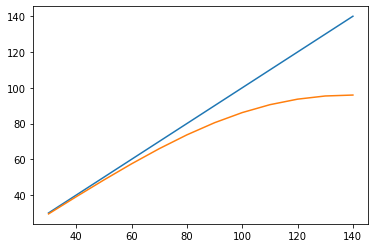

In [18]:
d_plotted = D[6]
print(d_plotted)
v_wo_stops = V
v_effective = X[:,6]
fig = plt.figure()
ax = plt.axes()
ax.plot(V, V, label='wo stops')
ax.plot(V, v_effective, label='effective');